## Titanic EDA using Speedml Package

This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset using the imported [Speedml](https://speedml.com) package.

> Speedml is a Python package for speed starting machine learning projects. 

Speedml is available as a [PyPi package](https://pypi.python.org/pypi/speedml). You can pip install `pip install speedml` and package import `from speedml import Speedml` when running this notebook on your laptop or environment that supports installation of custom pip packages.

### This notebook uses Speedml v0.9.1.

In [36]:
from speedml import Speedml

%matplotlib inline

## Initialize

Let us load the datasets, identify target variable `Survived` and unique id `PassengerId` using single call to Speedml.

Then return the shape information (#samples, #features) or (#features).

In [37]:
sml = Speedml('../input/titanic/train.csv', 
              '../input/titanic/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

Shape: train (891, 11) test (418, 10)
Numerical: train_n (6) test_n (5)


In [38]:
print(sml.about())

You are running Speedml v0.9.1.
Train dataset is 54.55% model ready.
Datasets contain 1014 null values.


## Datasets

Speedml API exposes pandas methods directly so you can do with speedml what you can do with pandas.

In [39]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observations**

- The dataset contains several text features which need to be converted to numeric for model ready data.
- Name feature may contain inconsistent non-categorical data. Candidate for feature extraction and dropping.
- Is Ticket feature categorical? Do Ticket values remain same across multiple samples or passengers?

In [40]:
sml.train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Speedml intuitively extends popular API so you have to type less.

In [41]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2)

**Observations**

- Age feature contains null values which may need to be imputed.
- Cabin feature has a lot of null values
- Embarked feature has few null values for train dataset.

## Correlations

Plot correlation matrix heatmap for numerical features of the training dataset. Use this plot to understand if certain features are duplicate, are of low importance, or possibly high importance for our model.

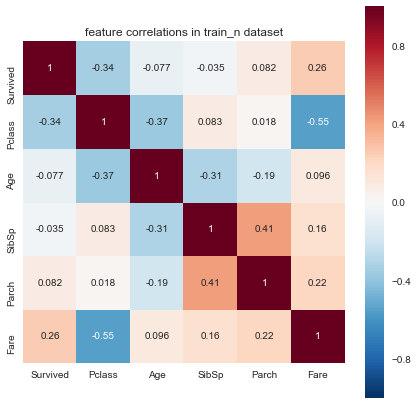

In [42]:
sml.plot.correlate()

## Distributions

Plot multiple feature distribution histogram plots for all numeric features. This helps understand skew of distribution from normal (horizontal middle) to quickly and relatively identify outliers in the dataset.

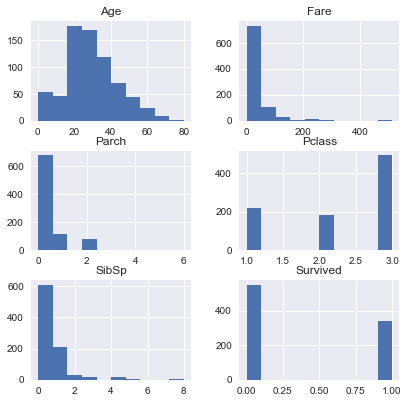

In [43]:
sml.plot.distribute()

## Outliers for categorical features

We use Violin plots on categorical features to note distribution of values across target variable and existence of any outliers (long thin lines extending out in the plots).

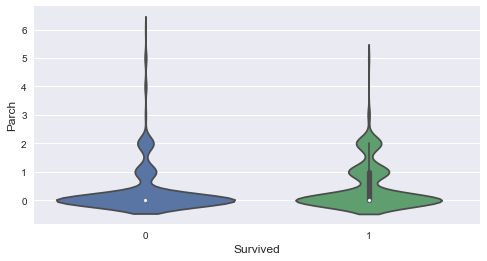

In [44]:
sml.plot.ordinal('Parch')

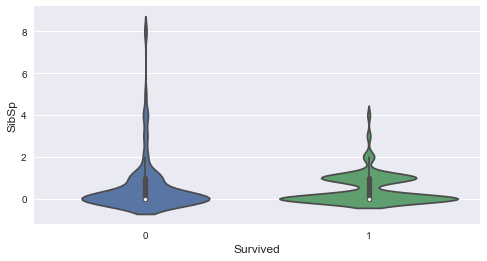

In [45]:
sml.plot.ordinal('SibSp')

## Outliers for continuous features

We use scatter plots to determine outliers for continuous features. The further out and spread the upper or lower part of the curve, the more the outliers deviate from normal distribution.

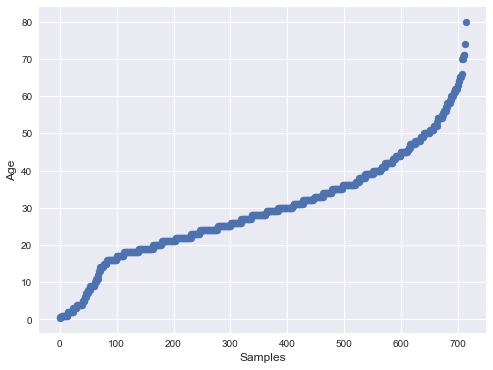

In [46]:
sml.plot.continuous('Age')

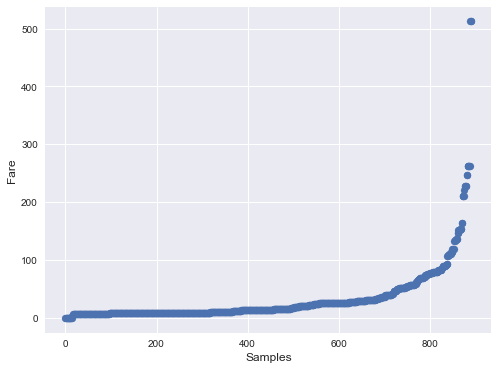

In [47]:
sml.plot.continuous('Fare')

## Cross-tabulate features and target

Following analysis uses simple crosstab method to note how samples are distributed across target variable when classified by a certain feature.

Another representation of cross-tabulation is using a bar plot with x-axis as the feature to compare across target variable on y-axis. The bar length or height represents ratio of compared feature values across the target feature values.

In [48]:
sml.plot.crosstab('Pclass', 'Survived')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [49]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


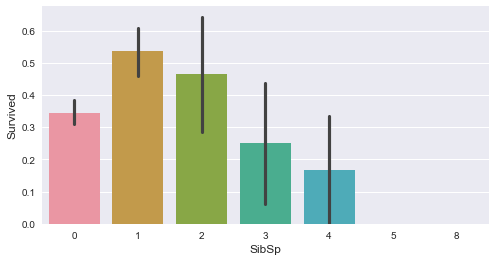

In [50]:
sml.plot.bar('SibSp', 'Survived')

In [51]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [52]:
sml.plot.crosstab('Sex', 'Survived')

Survived,0,1
Sex,,
female,81,233
male,468,109


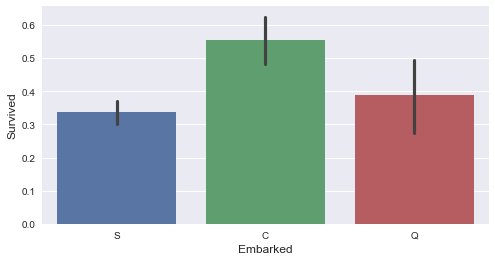

In [53]:
sml.plot.bar('Embarked', 'Survived')

In [54]:
sml.plot.crosstab('Embarked', 'Survived')

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


## Compare categorical across continuous features

Following analysis uses a specialized scatter plot (with fewer overlapping points) to visualize the categorical feature (x-axis, Pclass) across continuous feature (y-axis, Fare) while color coding the scatter points with the target variable (Survived).

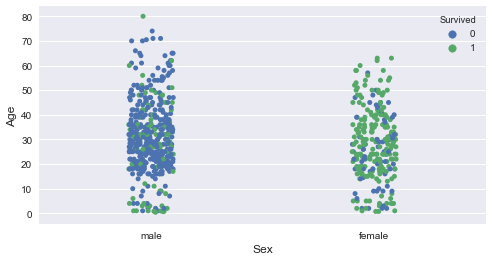

In [55]:
sml.plot.strip('Sex', 'Age')

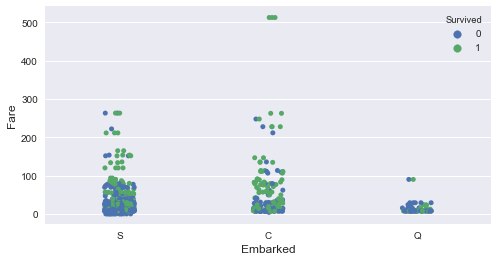

In [56]:
sml.plot.strip('Embarked', 'Fare')

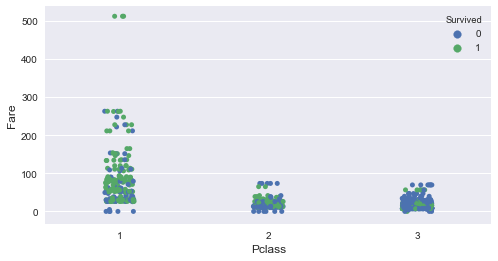

In [57]:
sml.plot.strip('Pclass', 'Fare')

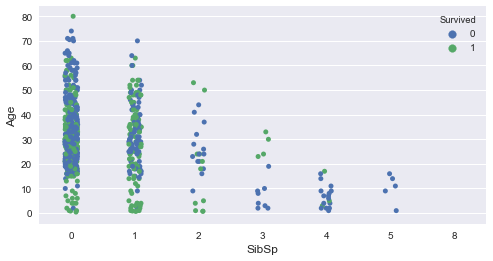

In [58]:
sml.plot.strip('SibSp', 'Age')

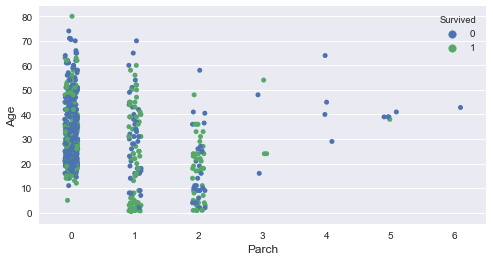

In [59]:
sml.plot.strip('Parch', 'Age')